##**Análise exploratória dos dados**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights.csv?raw=True')

In [54]:
df = df.sample(n=10000, random_state=42)

In [55]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,134,2017,False,-4.298068
9354,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,258,2011,False,29.712747
64321,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,273,2021,False,20.725673
24993,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,206,2014,False,55.791744
10688,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,347,2011,False,16.965341


In [56]:
df.shape

(10000, 11)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 40337 to 44260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       10000 non-null  int64  
 1   airline         10000 non-null  object 
 2   aircraft_type   10000 non-null  object 
 3   schengen        10000 non-null  object 
 4   origin          10000 non-null  object 
 5   arrival_time    10000 non-null  float64
 6   departure_time  10000 non-null  float64
 7   day             10000 non-null  int64  
 8   year            10000 non-null  int64  
 9   is_holiday      10000 non-null  bool   
 10  delay           10000 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 869.1+ KB


In [58]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             10000
dtype: int64

In [59]:
df['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [60]:
df['is_holiday'].unique()

array([False,  True])

##**Pré-processamento dos dados**

In [61]:
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,134,2017,False,-4.298068
9354,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,258,2011,False,29.712747
64321,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,273,2021,False,20.725673
24993,16,MM,Airbus A320,non-schengen,CSF,17.041281,20.041281,206,2014,False,55.791744
10688,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,347,2011,False,16.965341
...,...,...,...,...,...,...,...,...,...,...,...
40080,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,117,2017,False,-3.526488
40123,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,119,2017,False,28.988881
45488,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,112,2018,False,0.002130
30240,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,191,2015,True,30.354029


In [62]:
# Transformando valores das colunas schengen e is_holiday
df['is_holiday'] = df['is_holiday'].map({False: 0, True: 1})
df['schengen'] = df['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [63]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,11,BZ,Airbus A320,0,EMM,10.177197,13.177197,134,2017,0,-4.298068
9354,22,YE,Airbus A320,0,MWL,8.794147,11.794147,258,2011,0,29.712747
64321,5,BZ,Airbus A320,1,ZQO,9.344097,12.344097,273,2021,0,20.725673
24993,16,MM,Airbus A320,0,CSF,17.041281,20.041281,206,2014,0,55.791744
10688,7,MM,Boeing 787,1,TZF,8.564949,13.564949,347,2011,0,16.965341


In [65]:
# Lista de variáveis categóricas
categorical_vars = ['airline', 'aircraft_type', 'origin']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [66]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_BZ,airline_MM,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
40337,11,0,10.177197,13.177197,134,2017,0,-4.298068,1,0,...,0,0,0,1,0,0,0,0,0,0
9354,22,0,8.794147,11.794147,258,2011,0,29.712747,0,0,...,0,0,0,0,0,1,0,0,0,0
64321,5,1,9.344097,12.344097,273,2021,0,20.725673,1,0,...,0,0,0,0,0,0,0,0,0,1
24993,16,0,17.041281,20.041281,206,2014,0,55.791744,0,1,...,0,0,1,0,0,0,0,0,0,0
10688,7,1,8.564949,13.564949,347,2011,0,16.965341,0,1,...,0,0,0,0,0,0,0,0,1,0


In [67]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973235
departure_time,0.973235,1.000000


##**Modelo RandomForestRegressor**

In [68]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [69]:
X.head()

,schengen,arrival_time,is_holiday,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
40337,0,10.177197,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9354,0,8.794147,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
64321,1,9.344097,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24993,0,17.041281,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10688,1,8.564949,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
y.head()

40337    -4.298068
9354     29.712747
64321    20.725673
24993    55.791744
10688    16.965341
Name: delay, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 182.21128982279814
Root Mean Squared Error: 13.498566213594618
Mean Absolute Error: 10.82006916134415
R-squared: 0.6553413078065182


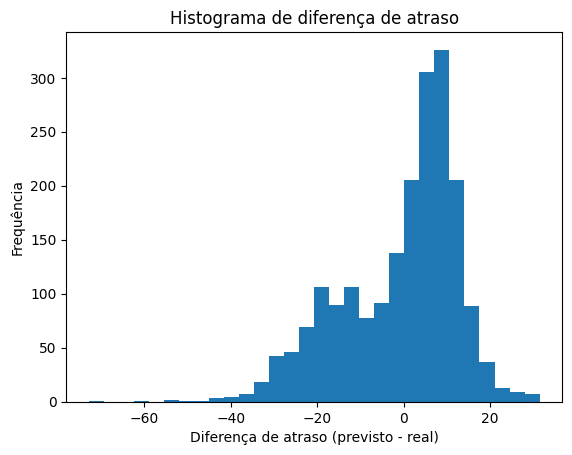

In [73]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

###**Criando uma nova feature: is_weekend**

In [74]:
#Criando uma nova feature: is_weekend
df_encoded['is_weekend'] = df_encoded['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [75]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_BZ,airline_MM,...,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,is_weekend
40337,11,0,10.177197,13.177197,134,2017,0,-4.298068,1,0,...,0,0,1,0,0,0,0,0,0,False
9354,22,0,8.794147,11.794147,258,2011,0,29.712747,0,0,...,0,0,0,0,1,0,0,0,0,True
64321,5,1,9.344097,12.344097,273,2021,0,20.725673,1,0,...,0,0,0,0,0,0,0,0,1,True
24993,16,0,17.041281,20.041281,206,2014,0,55.791744,0,1,...,0,1,0,0,0,0,0,0,0,False
10688,7,1,8.564949,13.564949,347,2011,0,16.965341,0,1,...,0,0,0,0,0,0,0,1,0,False


In [76]:
# Transformando valores 'False' e 'True' em 0 e 1
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({False: 0, True: 1})

In [77]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_BZ,airline_MM,...,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,is_weekend
40337,11,0,10.177197,13.177197,134,2017,0,-4.298068,1,0,...,0,0,1,0,0,0,0,0,0,0
9354,22,0,8.794147,11.794147,258,2011,0,29.712747,0,0,...,0,0,0,0,1,0,0,0,0,1
64321,5,1,9.344097,12.344097,273,2021,0,20.725673,1,0,...,0,0,0,0,0,0,0,0,1,1
24993,16,0,17.041281,20.041281,206,2014,0,55.791744,0,1,...,0,1,0,0,0,0,0,0,0,0
10688,7,1,8.564949,13.564949,347,2011,0,16.965341,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 69.07698110323099
Root Mean Squared Error: 8.311256289107622
Mean Absolute Error: 6.04707479745361
R-squared: 0.8693386014068234


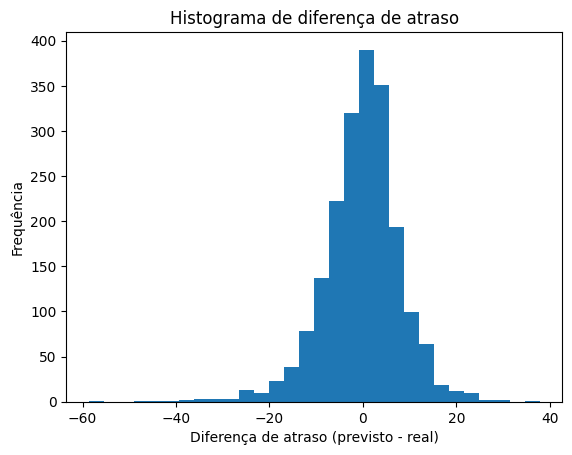

In [81]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

###**Validação-cruzada**

In [82]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Definindo as métricas de avaliação
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

# Realizando a validação cruzada e calculando as métricas
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Extraindo as métricas de avaliação
mse_scores = cv_results['test_mse']
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']
r2_scores = cv_results['test_r2']

# Calculando o desvio-padrão das métricas
mse_std = np.std(mse_scores)
rmse_std = np.std(rmse_scores)
mae_std = np.std(mae_scores)
r2_std = np.std(r2_scores)

# Imprimindo as métricas de avaliação e desvio-padrão
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"R2 Scores: {r2_scores}")
print('----------------------------------------------------------------')
print(f"MSE Mean: {mse_scores.mean()}, MSE Std: {mse_std}")
print(f"RMSE Mean: {rmse_scores.mean()}, RMSE Std: {rmse_std}")
print(f"MAE Mean: {mae_scores.mean()}, MAE Std: {mae_std}")
print(f"R2 Mean: {r2_scores.mean()}, R2 Std: {r2_std}")

MSE Scores: [71.39593925 70.18900918 72.91954169 71.47869184 71.01411446]
RMSE Scores: [8.44961178 8.37788811 8.53929398 8.45450719 8.42698727]
MAE Scores: [6.21557627 6.18819602 6.10107025 6.12144214 6.22422099]
R2 Scores: [0.86837912 0.86854509 0.86652282 0.86375876 0.87404497]
----------------------------------------------------------------
MSE Mean: 71.39945928433264, MSE Std: 0.8866364290864808
RMSE Mean: 8.449657666636595, RMSE Std: 0.05238893950112197
MAE Mean: 6.170101135525863, MAE Std: 0.0499145946090247
R2 Mean: 0.8682501524668333, R2 Std: 0.003371638805090539


###**Feature importance**

In [83]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibindo as importâncias das features
feature_importance_df

,Feature,Importance
3,airline_BZ,0.392795
22,is_weekend,0.229326
2,is_holiday,0.108202
6,aircraft_type_Airbus A320,0.078959
7,aircraft_type_Airbus A330,0.042231
1,arrival_time,0.031881
11,aircraft_type_Embraer E175,0.031445
19,origin_TCY,0.015309
10,aircraft_type_Boeing 787,0.014597
14,origin_CSF,0.013892


###**Hiperparâmetros**

In [84]:
# Imprimir os parâmetros do modelo
params = model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [85]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(parametros, modelo, X_train, y_train):

  #Determinando o modelo e quais parâmetros serão adicionados
  modelo_grid = GridSearchCV(modelo, param_grid=parametros, cv=5, scoring='neg_mean_absolute_error')

  #Treino
  modelo_grid.fit(X_train, y_train)

  #Obtenção dos melhores valores para cada parâmetro
  best_params = modelo_grid.best_params_

  return best_params

In [86]:
# Definindo os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,3]
}

modelo_rf = RandomForestRegressor(random_state=42)

In [87]:
grid_search_cv(param_grid, modelo_rf, X_train, y_train)

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
# Treinando o modelo
model = RandomForestRegressor(random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 68.91253973769726
Root Mean Squared Error: 8.301357704478061
Mean Absolute Error: 6.042217204661081
R-squared: 0.8696496476984252


**Antes da otimização:**

- Mean Squared Error: 69.07698110323099
- Root Mean Squared Error: 8.311256289107622
- Mean Absolute Error: 6.04707479745361
- R-squared: 0.8693386014068234

###**Gradient Boosting Regressor**

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
# Treinando o modelo
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_boosting.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 69.16201911862846
Root Mean Squared Error: 8.316370549622501
Mean Absolute Error: 6.087796897089667
R-squared: 0.8691777491830006


In [91]:
# Definir os hiperparâmetros para testar
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
modelo_boosting = GradientBoostingRegressor(random_state=42)

In [92]:
grid_search_cv(parameters, modelo_boosting, X_train, y_train)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [93]:
# Treinando o modelo
model_boosting = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)
model_boosting.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_boosting.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 68.47812045360301
Root Mean Squared Error: 8.27515078132133
Mean Absolute Error: 6.028584721984536
R-squared: 0.8704713661685879
